# **Load Librarry**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# **Load Dataset**

In [3]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_multilabel/Binary_Target_CFeaturesEngineering_Nm_NoDup.csv'

In [4]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

# **Data Splitting and Scaling**

## **Split Features and Target**

In [5]:
# Pisahkan fitur dan target
y = df_main.filter(like='nama_industri_encoded_')
X = df_main.drop(columns=y.columns)

## **Scaling Features**

In [6]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Split Data Train and Data Test**

In [7]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Inisialisasi jumlah kelas
num_classes = len(y_train.columns)

In [9]:
# Mengubah DataFrame menjadi array numpy
y_train = y_train.to_numpy()

In [10]:
# Mengubah DataFrame menjadi array numpy
y_test = y_test.to_numpy()

## **Check Label Distribution**

In [11]:
from collections import Counter

In [12]:
# Menghitung jumlah total sampel
total_samples = len(y_train)

# Menghitung jumlah sampel untuk setiap kelas
label_counts = np.sum(y, axis=0)

# Menampilkan jumlah sampel untuk setiap kelas
print("Label counts in training data:")
for i, count in enumerate(label_counts):
    class_name = f"Class {i+1}"
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}%)")

Label counts in training data:
Class 1: 531 samples (2.01%)
Class 2: 531 samples (2.01%)
Class 3: 527 samples (1.99%)
Class 4: 531 samples (2.01%)
Class 5: 526 samples (1.99%)
Class 6: 529 samples (2.00%)
Class 7: 525 samples (1.99%)
Class 8: 531 samples (2.01%)
Class 9: 529 samples (2.00%)
Class 10: 514 samples (1.94%)
Class 11: 508 samples (1.92%)
Class 12: 531 samples (2.01%)
Class 13: 517 samples (1.96%)
Class 14: 528 samples (2.00%)
Class 15: 473 samples (1.79%)
Class 16: 522 samples (1.98%)
Class 17: 526 samples (1.99%)
Class 18: 531 samples (2.01%)
Class 19: 518 samples (1.96%)
Class 20: 523 samples (1.98%)
Class 21: 525 samples (1.99%)
Class 22: 445 samples (1.68%)
Class 23: 515 samples (1.95%)
Class 24: 524 samples (1.98%)
Class 25: 525 samples (1.99%)
Class 26: 528 samples (2.00%)
Class 27: 531 samples (2.01%)
Class 28: 529 samples (2.00%)
Class 29: 528 samples (2.00%)
Class 30: 530 samples (2.01%)
Class 31: 531 samples (2.01%)
Class 32: 531 samples (2.01%)
Class 33: 531 samp

# **GridsearchCV for Hyperparameter Tuning**

## **Extreme Gradient Boosting Multi-Label Classifier**

In [13]:
# Inisialisasi model
xgboost = XGBClassifier(tree_method="hist", device="cuda")

# Mendapatkan parameter default
paramsXgb = xgboost.get_params()

# Mencetak parameter default
print("Parameter default XGBoostClassifier:")
for param, value in paramsXgb.items():
    print(f"{param}: {value}")

Parameter default XGBoostClassifier:
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: cuda
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: hist
validate_parameters: None
verbosity: None


In [14]:
# Inisialisasi XGBClassifier untuk menggunakan GPU
xgboost = XGBClassifier()

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5]
}

# Inisialisasi GridSearchCV
grid_search_Xgb = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Latih model menggunakan GridSearchCV
grid_search_Xgb.fit(X_train, y_train)

# Dapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Xgb.best_params_)
print("Skor akurasi terbaik: ", grid_search_Xgb.best_score_)

# Evaluasi model terbaik pada set pengujian
best_model_Xgb = grid_search_Xgb.best_estimator_
y_pred_Xgb = best_model_Xgb.predict(X_test)

# Hitung metrik evaluasi
accuracy_Xgb = accuracy_score(y_test, y_pred_Xgb)
precision_Xgb = precision_score(y_test, y_pred_Xgb, average='macro')
recall_Xgb = recall_score(y_test, y_pred_Xgb, average='macro')
f1_Xgb = f1_score(y_test, y_pred_Xgb, average='macro')

# Tampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Xgb:.4f}")
print(f"Presisi: {precision_Xgb:.4f}")
print(f"Recall: {recall_Xgb:.4f}")
print(f"F1 Score: {f1_Xgb:.4f}")

Parameter terbaik yang ditemukan:  {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Skor akurasi terbaik:  0.8952246075118188

Akurasi set pengujian dengan parameter terbaik: 0.8995
Presisi: 0.9608
Recall: 0.9151
F1 Score: 0.9365


## **Adaptive Boosting Multi-Label Classifier**

In [15]:
# Inisialisasi model
ada = AdaBoostClassifier()

# Mendapatkan parameter default
paramsAda = ada.get_params()

# Mencetak parameter default
print("Parameter default AdaBoostClassifier:")
for param, value in paramsAda.items():
    print(f"{param}: {value}")

Parameter default AdaBoostClassifier:
algorithm: SAMME.R
estimator: None
learning_rate: 1.0
n_estimators: 50
random_state: None


In [17]:
# Inisialisasi model
adaboost = MultiOutputClassifier(AdaBoostClassifier(), n_jobs=-1)

# Mendefinisikan parameter grid untuk pencarian
param_grid_adb = {
    'estimator__n_estimators': [50, 100 ,200],
    'estimator__learning_rate': [0.01, 0.1, 0.3, 1.0],
    'estimator__estimator': [DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=2), None],
    'estimator__algorithm': ['SAMME.R']
}


# Menginisialisasi GridSearchCV
grid_search_Ada = GridSearchCV(estimator=adaboost, param_grid=param_grid_adb, cv=5, scoring='accuracy')

# Melatih model GridSearchCV
grid_search_Ada.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Ada.best_params_)
print("Skor akurasi terbaik: ", grid_search_Ada.best_score_)

# Mengevaluasi model terbaik pada set pengujian
best_model_Ada = grid_search_Ada.best_estimator_
y_pred_Ada = best_model_Ada.predict(X_test)

# Menghitung metrik evaluasi
accuracy_Ada = accuracy_score(y_test, y_pred_Ada)
precision_Ada  = precision_score(y_test, y_pred_Ada, average='macro')
recall_Ada  = recall_score(y_test, y_pred_Ada, average='macro')
f1_Ada  = f1_score(y_test, y_pred_Ada, average='macro')

# Menampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Ada:.4f}")
print(f"Precision: {precision_Ada:.4f}")
print(f"Recall: {recall_Ada:.4f}")
print(f"F1 Score: {f1_Ada :.4f}")

Parameter terbaik yang ditemukan:  {'estimator__algorithm': 'SAMME.R', 'estimator__estimator': DecisionTreeClassifier(max_depth=2), 'estimator__learning_rate': 0.3, 'estimator__n_estimators': 200}
Skor akurasi terbaik:  0.8914028989304678

Akurasi set pengujian dengan parameter terbaik: 0.8938
Precision: 0.9582
Recall: 0.9101
F1 Score: 0.9326


## **Decision Tree Multi-Label Classifier**

In [18]:
# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Mendapatkan parameter default
paramsdt = dt.get_params()

# Mencetak parameter default
print("Parameter default DecisionTreeClassifier:")
for param, value in paramsdt.items():
    print(f"{param}: {value}")

Parameter default DecisionTreeClassifier:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


In [20]:
# Inisialisasi model
dt = MultiOutputClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1)

param_grid_dt = {
    'estimator__min_samples_split':[2,5,10],
    'estimator__max_depth': [None,1,2,3 ],
    'estimator__splitter':['best', 'random'],
    'estimator__min_samples_leaf':[1,2,4,6],
    'estimator__criterion':['gini', 'entropy', 'log_loss'],
    'estimator__max_leaf_nodes': [None, 10, 20]
    }


# Menginisialisasi GridSearchCV
grid_search_Dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Melatih model GridSearchCV
grid_search_Dt.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Dt.best_params_)
print("Skor akurasi terbaik: ", grid_search_Dt.best_score_)

# Mengevaluasi model terbaik pada set pengujian
best_model_Dt  = grid_search_Dt.best_estimator_
y_pred_Dt  = best_model_Dt.predict(X_test)

# Menghitung metrik evaluasi
accuracy_Dt = accuracy_score(y_test, y_pred_Dt)
precision_Dt  = precision_score(y_test, y_pred_Dt, average='macro')
recall_Dt  = recall_score(y_test, y_pred_Dt, average='macro')
f1_Dt  = f1_score(y_test, y_pred_Dt, average='macro')

# Menampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Dt:.4f}")
print(f"Precision: {precision_Dt:.4f}")
print(f"Recall: {recall_Dt:.4f}")
print(f"F1 Score: {f1_Dt:.4f}")

Parameter terbaik yang ditemukan:  {'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__max_leaf_nodes': None, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__splitter': 'best'}
Skor akurasi terbaik:  0.8832296088523585

Akurasi set pengujian dengan parameter terbaik: 0.8832
Precision: 0.9445
Recall: 0.9092
F1 Score: 0.9257


## **Best Parameters**

**XGB**

Parameter terbaik yang ditemukan:  {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}

**Latih**
* Skor akurasi terbaik:  0.8952246075118188

**Uji**
* Akurasi set pengujian dengan parameter terbaik: 0.8995
* Presisi: 0.9608
* Recall: 0.9151
* F1 Score: 0.9365

In [21]:
# xgb_params = {
#     'colsample_bytree': 0.8,
#     'learning_rate': 0.1,
#     'max_depth': 6,
#     'n_estimators': 200,
#     'subsample': 1.0
# }

# # Inisialisasi model
# best_model_Xgb = XGBClassifier(**xgb_params, tree_method="hist", device="cuda")

**ADB**

Parameter terbaik yang ditemukan:  {'estimator__algorithm': 'SAMME.R', 'estimator__estimator': DecisionTreeClassifier(max_depth=2), 'estimator__learning_rate': 0.3, 'estimator__n_estimators': 200}

**Latih**
Skor akurasi terbaik:  0.8914028989304678

**Uji**
* Akurasi set pengujian dengan parameter terbaik: 0.8938
* Precision: 0.9582
* Recall: 0.9101
* F1 Score: 0.9326

In [22]:
# dt_params = {
#     'max_depth': 3
# }

# adb_params = {
#     'algorithm': 'SAMME.R',
#     'n_estimators': 200,
#     'learning_rate': 0.1,
#     'estimator': DecisionTreeClassifier(**dt_params)
# }

# # Inisialisasi model
# best_model_Ada = MultiOutputClassifier(AdaBoostClassifier(**adb_params), n_jobs=-1)

**DT**

Parameter terbaik yang ditemukan:  {'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__max_leaf_nodes': None, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__splitter': 'best'}

**Latih**
* Skor akurasi terbaik:  0.8832296088523585

**Uji**
* Akurasi set pengujian dengan parameter terbaik: 0.8832
* Precision: 0.9445
* Recall: 0.9092
* F1 Score: 0.9257

In [23]:
# dt_params = {
#     'criterion': 'entropy',
#     'max_depth': None,
#     'min_samples_leaf': 2,
#     'min_samples_split': 10,
#     'splitter': 'best'
# }

# # Inisialisasi model
# best_model_Dt = DecisionTreeClassifier(**dt_params)

# **Cross Validation Evaluation**

In [24]:
def cross_validation_classification(estimator, X, y, cv, model_name):
    # Definisikan scoring untuk evaluasi
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    # Melakukan cross-validation dan mendapatkan hasil
    results = cross_validate(estimator, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Menghitung rata-rata metrik untuk data pelatihan
    train_accuracy_mean = np.mean(results['train_accuracy'])
    train_precision_mean = np.mean(results['train_precision'])
    train_recall_mean = np.mean(results['train_recall'])
    train_f1_mean = np.mean(results['train_f1'])

    # Menghitung rata-rata metrik untuk data validasi (cross-validation)
    val_accuracy_mean = np.mean(results['test_accuracy'])
    val_precision_mean = np.mean(results['test_precision'])
    val_recall_mean = np.mean(results['test_recall'])
    val_f1_mean = np.mean(results['test_f1'])

    # Membuat dictionary untuk hasil pelatihan
    dataTraincv = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(train_accuracy_mean)],
        'Precision (Train)': ['{:.5f}'.format(train_precision_mean)],
        'Recall (Train)': ['{:.5f}'.format(train_recall_mean)],
        'F1 Score (Train)': ['{:.5f}'.format(train_f1_mean)],
    }

    # Membuat dictionary untuk hasil validasi (cross-validation)
    dataValcv = {
        'Model': [model_name],
        'Accuracy (Val)': ['{:.5f}'.format(val_accuracy_mean)],
        'Precision (Val)': ['{:.5f}'.format(val_precision_mean)],
        'Recall (Val)': ['{:.5f}'.format(val_recall_mean)],
        'F1 Score (Val)': ['{:.5f}'.format(val_f1_mean)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan validasi (cross-validation)
    df_Trcv = pd.DataFrame(dataTraincv)
    df_Valcv = pd.DataFrame(dataValcv)

    return df_Trcv, df_Valcv

In [25]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### **XGBoost Evaluation**

In [26]:
dfXGB_Trcv, dfXGB_Valcv = cross_validation_classification(best_model_Xgb, X, y, kfold, 'Xgboost')

### **AdaBoost Evaluation**

In [27]:
dfADB_Trcv, dfADB_Valcv = cross_validation_classification(best_model_Ada, X, y, kfold, 'AdaBoost')

### **Decision Tree Evaluation**

In [28]:
dfDCT_Trcv, dfDCT_Valcv = cross_validation_classification(best_model_Dt, X, y, kfold, 'DecisionTree')

### **Comparison of CV Evaluation**

In [29]:
df_Trcv = pd.concat([dfXGB_Trcv, dfADB_Trcv, dfDCT_Trcv], ignore_index=True)
df_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Xgboost,0.96271,0.99337,0.97117,0.98189
1,AdaBoost,0.96327,0.99342,0.97212,0.98234
2,DecisionTree,0.93450,0.98725,0.94767,0.96673


In [30]:
df_Valcv = pd.concat([dfXGB_Valcv, dfADB_Valcv, dfDCT_Valcv], ignore_index=True)
df_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Xgboost,0.90268,0.96183,0.91775,0.93814
1,AdaBoost,0.89844,0.96263,0.91389,0.93639
2,DecisionTree,0.89121,0.94664,0.91248,0.92825


# **Learning Curve**

In [31]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        train_size = int(train_size * len(X_train))
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        model.fit(X_train_subset, y_train_subset)

        train_score = model.score(X_train_subset, y_train_subset)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    ax.plot(train_sizes * len(X_train), train_scores, 'o-', color="b", label="Training score")
    ax.plot(train_sizes * len(X_train), test_scores, 'o-', color="orange", label="Testing score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [32]:
def plot_learning_curvecv(model, X, y, cv, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score (CV)")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [33]:
def plot_learning_curves_per_model(model, X, y, X_train, y_train, X_test, y_test, cv):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    plot_learning_curve(model, X_train, y_train, X_test, y_test, ax1)
    plot_learning_curvecv(model, X, y, cv=cv, ax=ax2)
    ax1.set_title(f"Learning Curve - {model.__class__.__name__} (Original)")
    ax2.set_title(f"Learning Curve - {model.__class__.__name__} (Cross Validation)")

    plt.tight_layout()
    plt.show()

### **XGBoost Learning Curve**

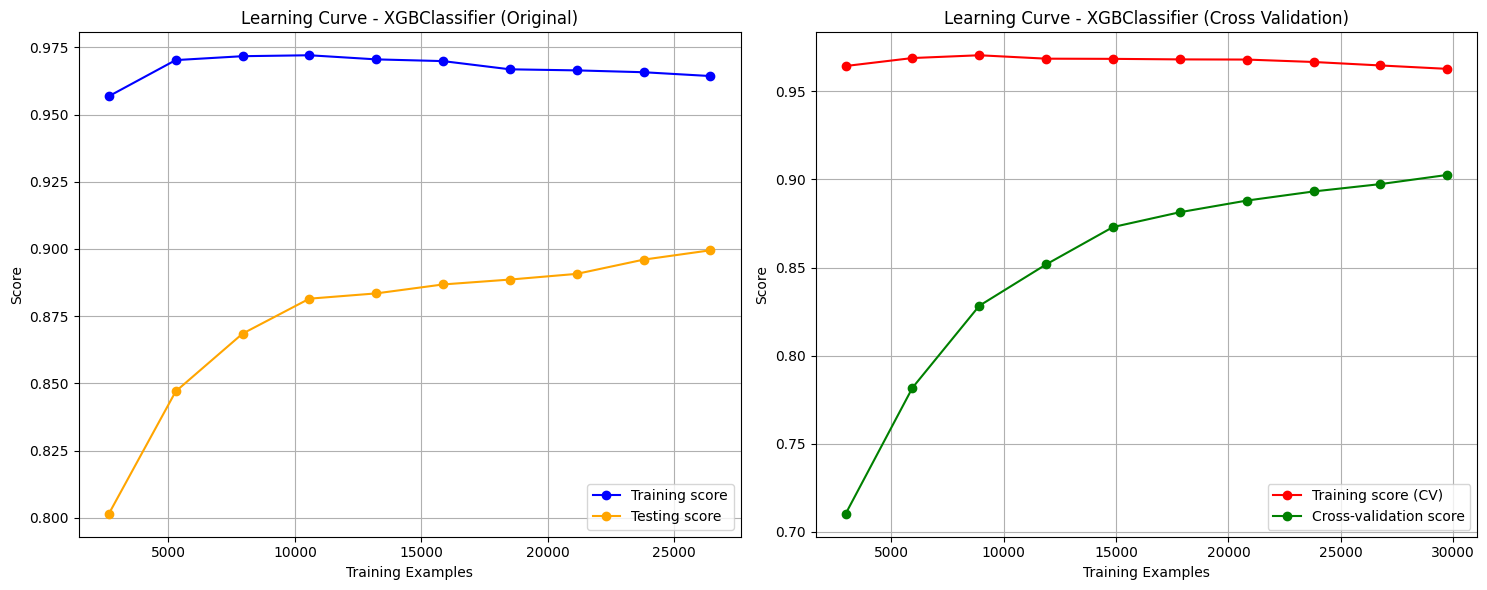

In [34]:
plot_learning_curves_per_model(best_model_Xgb, X, y, X_train, y_train, X_test, y_test, kfold)

### **AdaBoost Learning Curve**

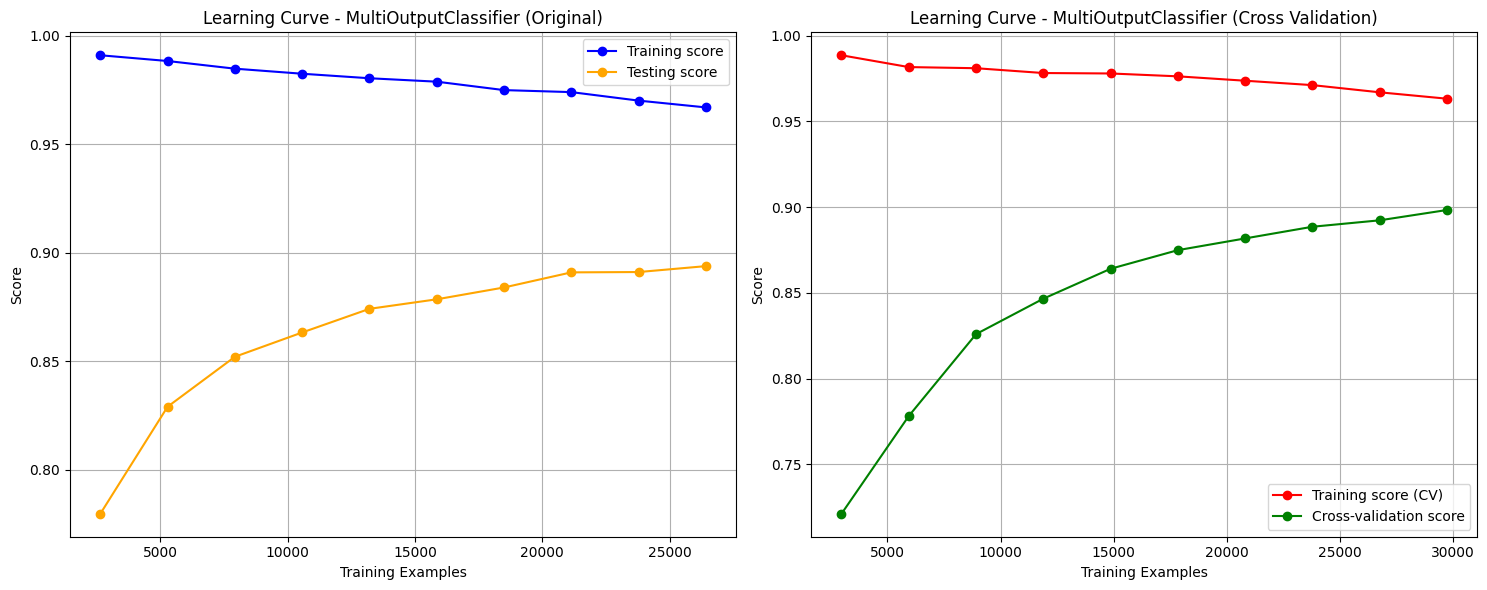

In [35]:
plot_learning_curves_per_model(best_model_Ada, X, y, X_train, y_train, X_test, y_test, kfold)

### **Decision Tree Learning Curve**

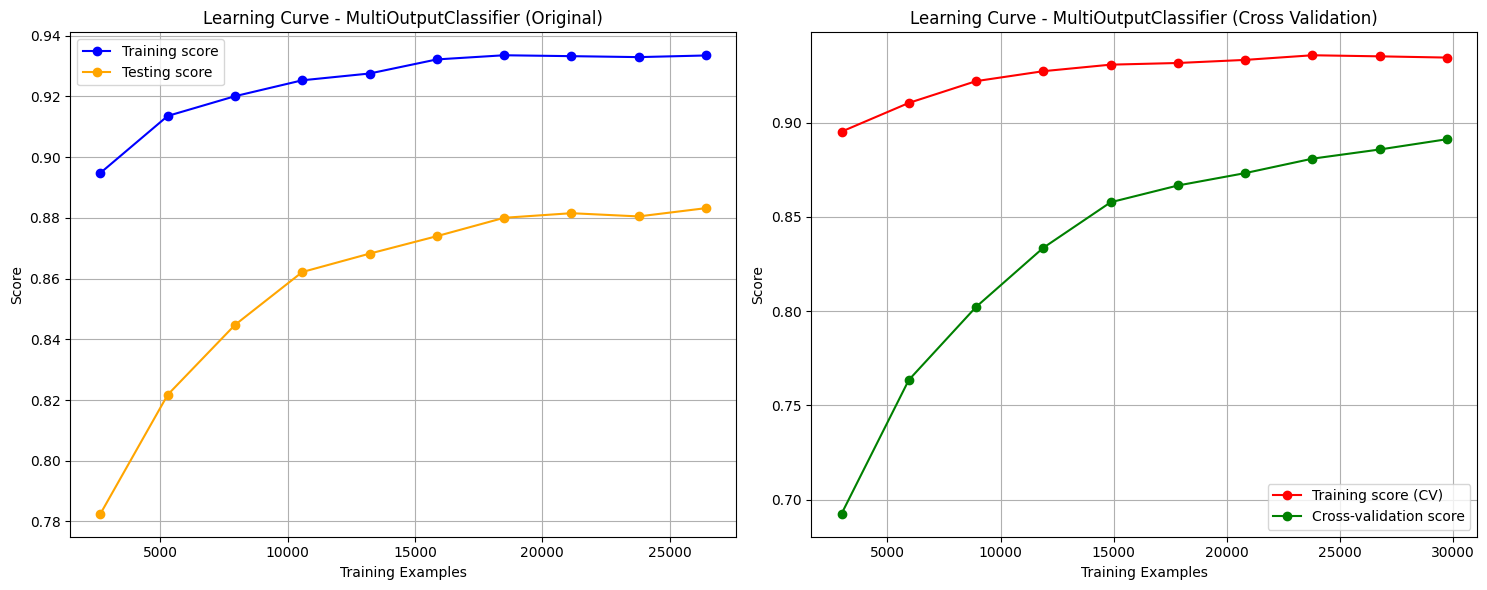

In [36]:
plot_learning_curves_per_model(best_model_Dt, X, y, X_train, y_train, X_test, y_test, kfold)

# **Simpan Model**

In [37]:
import joblib

# Misalkan ketiga model telah dilatih dan bernama best_model_Xgb, best_model_Ada, best_model_Dt
joblib.dump(best_model_Xgb, '../model/Xgb_model.pkl')
joblib.dump(best_model_Ada, '../model/Adb_model.pkl')
joblib.dump(best_model_Dt, '../model/Dt_model.pkl')

['../model/Dt_model.pkl']

In [38]:
# Misalkan ketiga model telah dilatih dan bernama best_model_Xgb, best_model_Ada, best_model_Dt
joblib.dump(best_model_Xgb, '../model/Xgb_model.joblib')
joblib.dump(best_model_Ada, '../model/Adb.joblib')
joblib.dump(best_model_Dt, '../model/Dt.joblib')

['../model/Dt.joblib']